In [1]:
from google.colab import files
uploaded = files.upload()

Saving Corona_NLP_train.csv to Corona_NLP_train.csv


In [75]:

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

import re 
import nltk 
from nltk.stem.porter import PorterStemmer

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, f1_score

from sklearn.metrics import confusion_matrix


from sklearn.model_selection import GridSearchCV

from sklearn import metrics




In [76]:
import io


In [77]:
train= pd.read_csv(io.BytesIO(uploaded['Corona_NLP_train.csv']),encoding = "ISO-8859-1")

In [78]:
x = train['OriginalTweet'].copy()
y = train['Sentiment'].copy()


In [79]:
encoding = {'Extremely Negative': 0,
            'Negative': 0,
            'Neutral': 1,
            'Positive':2,
            'Extremely Positive': 2
           }

labels = ['Negative', 'Neutral', 'Positive']

           

y.replace(encoding, inplace=True)

In [80]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [81]:
def data_cleaner(tweet):
    
    # remove urls
    tweet = re.sub(r'http\S+', ' ', tweet)
    
    tweet = re.sub('[^a-zA-Z]',' ',tweet)
    
    # remove html tags
    tweet = re.sub(r'<.*?>',' ', tweet)
    
    # remove digits
    tweet = re.sub(r'\d+',' ', tweet)
    
    # remove hashtags
    tweet = re.sub(r'#\w+',' ', tweet)
    
    # remove mentions
    tweet = re.sub(r'@\w+',' ', tweet)
    
    #removing stop words
#     tweet = tweet.split()
    
    tweet=[word.lower() for word in tweet.split()]
    
    stop_words = stopwords.words('english')
    tweet = " ".join([word for word in tweet if not word in stop_words])
    
    return tweet
X= x.apply(lambda x : data_cleaner(x))


In [82]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [83]:
from nltk.stem import WordNetLemmatizer


w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]


X = X.apply(lemmatize_text)

In [85]:
X=[" ".join(review) for review in X.values]

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer
count_vectorizer = TfidfVectorizer(
    analyzer="word", tokenizer=nltk.word_tokenize,
    preprocessor=None, stop_words='english',max_features=10000)    

tfidf = count_vectorizer.fit_transform(X)

len(count_vectorizer.get_feature_names())

10000

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf, y, test_size=0.20)


In [88]:

from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB(alpha=0.001)

In [90]:
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.001, class_prior=None, fit_prior=True)

In [91]:
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)


accuracy:   0.657


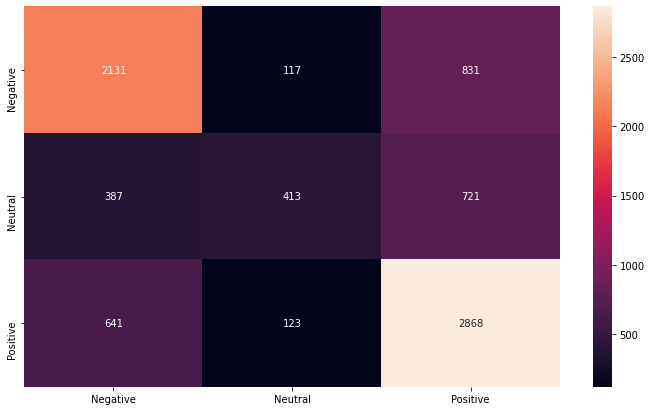

In [92]:
conf = confusion_matrix(y_test, pred)


cm = pd.DataFrame(
    conf, index = [i for i in labels],
    columns = [i for i in labels]
)

plt.figure(figsize = (12,7))
sns.heatmap(cm, annot=True, fmt="d")
plt.show()


In [93]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [94]:
rfc=RandomForestClassifier(random_state=42)

In [95]:
 param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [20,21,22,23,25],
    'criterion' :['gini', 'entropy']
 }

In [96]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [97]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 25,
 'max_features': 'auto',
 'n_estimators': 500}

In [98]:
rfc1=RandomForestClassifier(random_state=0, max_features='auto', n_estimators= 200, criterion='gini',n_jobs = -1)

In [99]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [100]:
r_pred=rfc1.predict(X_test)

In [101]:
print("Accuracy for Random Forest : ",accuracy_score(y_test,r_pred))

Accuracy for Random Forest :  0.7288629737609329


In [102]:
cm3=confusion_matrix(y_test, r_pred)
print (cm3)

[[2205  287  587]
 [ 250  929  342]
 [ 490  276 2866]]


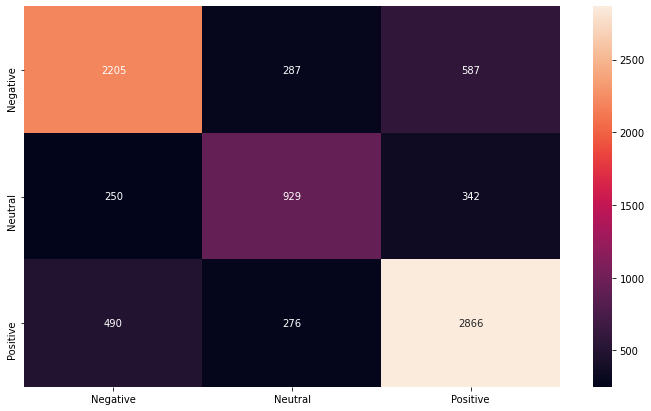

In [103]:
conf = confusion_matrix(y_test, r_pred)


cm = pd.DataFrame(
    conf, index = [i for i in labels],
    columns = [i for i in labels]
)

plt.figure(figsize = (12,7))
sns.heatmap(cm, annot=True, fmt="d")
plt.show()